# 色彩空间类型转换

In [26]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def show(img, title='Image'):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # 不显示坐标轴
    plt.title(title) # 图像题目
    plt.show()

## HSV

RGB是从硬件的角度提出的颜色模型，在与人眼匹配的过程中可能存在一定的差异，HSV色彩空间是一种面向视觉感知的颜色模型。HSV色彩空间从心理学和视觉的角度出发，指出人眼的色彩知觉主要包含三要素：色调（Hue，也称为色相）、饱和度（Saturation）、亮度（Value），色调指光的颜色，饱和度是指色彩的深浅程度，亮度指人眼感受到的光的明暗程度。

* 色调：色调与混合光谱中的主要光波长相关，例如“赤橙黄绿青蓝紫”分别表示不同的色调。如果从波长的角度考虑，不同波长的光表现为不同的颜色，实际上它们体现的是色调的差异。
* 饱和度：指相对纯净度，或一种颜色混合白光的数量。纯谱色是全饱和的，像深红色（红加白）和淡紫色（紫加白）这样的彩色是欠饱和的，饱和度与所加白光的数量成反比。
* 亮度：反映的是人眼感受到的光的明暗程度，该指标与物体的反射度有关。对于色彩来讲，如果在其中掺入的白色越多，则其亮度越高；如果在其中掺入的黑色越多，则其亮度越低。

In [28]:
import cv2
import numpy as np
#=========测试一下OpenCV中蓝色的HSV模式值=============
imgBlue=np.zeros([1,1,3], dtype=np.uint8)
imgBlue[0,0,0]=255
Blue=imgBlue
BlueHSV=cv2.cvtColor(Blue, cv2.COLOR_BGR2HSV)
print("Blue=\n", Blue)
print("BlueHSV=\n", BlueHSV)
#=========测试一下OpenCV中绿色的HSV模式值=============
imgGreen=np.zeros([1,1,3], dtype=np.uint8)
imgGreen[0,0,1]=255
Green=imgGreen
GreenHSV=cv2.cvtColor(Green, cv2.COLOR_BGR2HSV)
print("Green=\n", Green)
print("GreenHSV=\n", GreenHSV)
#=========测试一下OpenCV中红色的HSV模式值=============
imgRed=np.zeros([1,1,3], dtype=np.uint8)
imgRed[0,0,2]=255
Red=imgRed
RedHSV=cv2.cvtColor(Red, cv2.COLOR_BGR2HSV)
print("Red=\n", Red)
print("RedHSV=\n", RedHSV)

Blue=
 [[[255   0   0]]]
BlueHSV=
 [[[120 255 255]]]
Green=
 [[[  0 255   0]]]
GreenHSV=
 [[[ 60 255 255]]]
Red=
 [[[  0   0 255]]]
RedHSV=
 [[[  0 255 255]]]


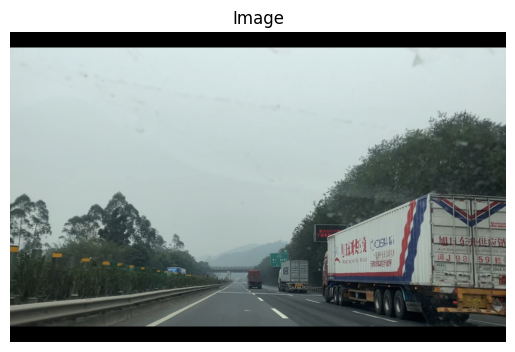

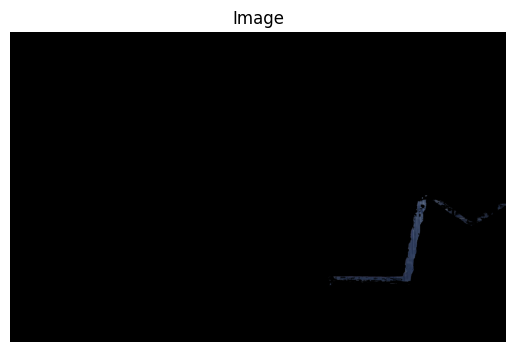

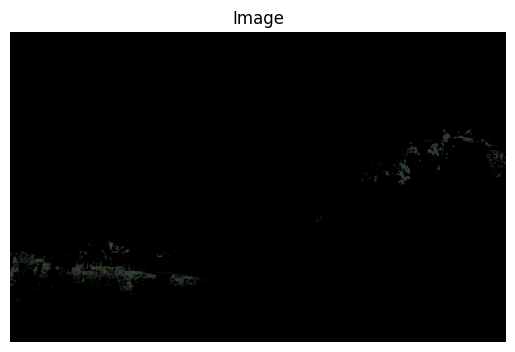

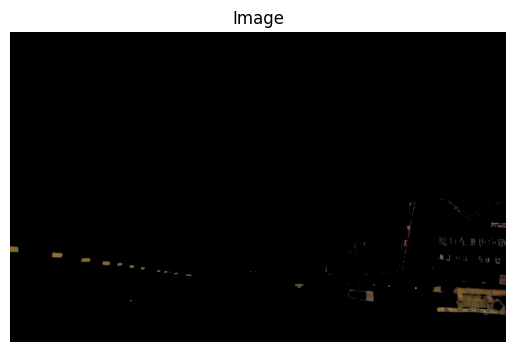

In [29]:
import cv2
import numpy as np
opencv=cv2.imread("images/highway.jpg")
hsv = cv2.cvtColor(opencv, cv2.COLOR_BGR2HSV)
show(opencv)
#=============指定蓝色值的范围=============
minBlue = np.array([110,50,50])
maxBlue = np.array([130,255,255])
#确定蓝色区域
mask = cv2.inRange(hsv, minBlue, maxBlue)
#通过掩码控制的按位与运算，锁定蓝色区域
blue = cv2.bitwise_and(opencv, opencv, mask= mask)
show(blue)
#=============指定绿色值的范围=============
minGreen = np.array([50,50,50])
maxGreen = np.array([70,255,255])
#确定绿色区域
mask = cv2.inRange(hsv, minGreen, maxGreen)
#通过掩码控制的按位与运算，锁定绿色区域
green = cv2.bitwise_and(opencv, opencv, mask= mask)
show(green)
#=============指定红色值的范围=============
minRed = np.array([0,50,50])
maxRed = np.array([30,255,255])
#确定红色区域
mask = cv2.inRange(hsv, minRed, maxRed)
#通过掩码控制的按位与运算，锁定红色区域
red= cv2.bitwise_and(opencv, opencv, mask= mask)
show(red)

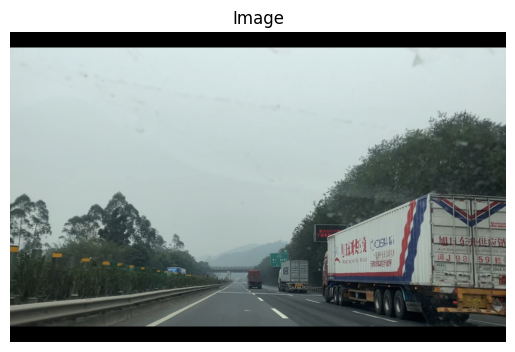

In [30]:
img = cv2.imread("images/highway.jpg")
show(img)

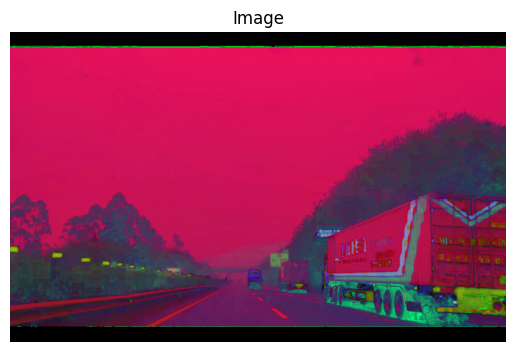

In [31]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# 错误的show()方法
show(hsv)

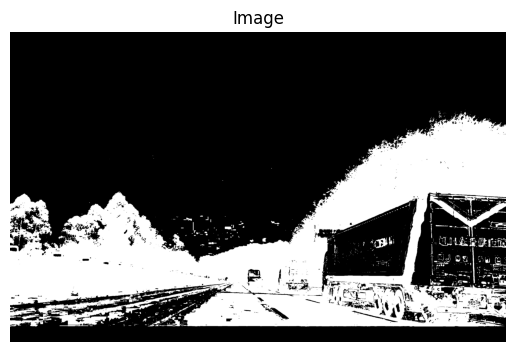

In [32]:
h, s, v = cv2.split(hsv)
hueMask = cv2.inRange(h, 5, 170)
satMask = cv2.inRange(s, 25, 166)
mask = cv2.bitwise_and(hueMask, satMask)
show(mask)

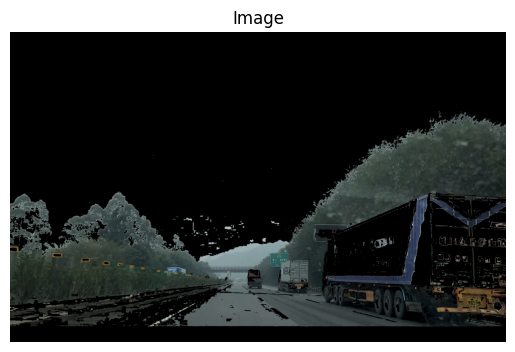

In [33]:
roi = cv2.bitwise_and(img, img, mask=mask)
show(roi)

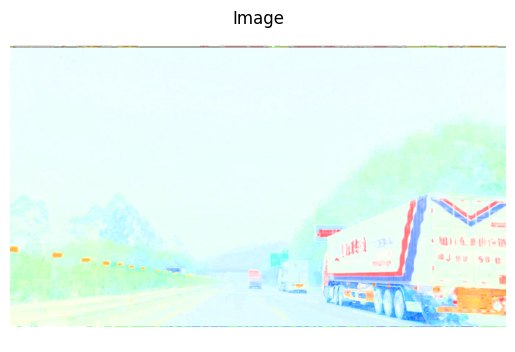

In [34]:
v[:, :] = 255
new_hsv = cv2.merge((h, s, v))
art = cv2.cvtColor(new_hsv, cv2.COLOR_HSV2BGR)
show(art)